
# THE SPARKS FOUNDATION

# TASK 1 - PREDICTION OF PERCENTAGE BASED ON THE STUDY HOURS


This is a project based on supervised ML . 
In this project we will use linear regression algorithm to predict the precent score of a student based on study hours.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#reading data from the url 

In [4]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()  #checking the first 5 rows of our dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
#checking the shape of the data
df.shape

(25, 2)

In [13]:
#checking the details like min,max ,mean etc.

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the score column.
### X and y arrays

In [27]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating and Training the Model

In [54]:
#import the linear regression model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression()

The best fit line of the training data


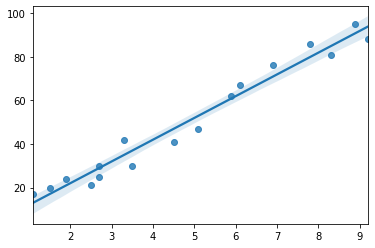

In [50]:
sns.regplot(x=X_train,y=y_train)
print("The best fit line of the training data")

## Predicting and Evaluating the  Model

In [83]:
y_pred=lm.predict(X_test)
y_pred
X_test.tolist()

[[2.5], [7.7], [3.8], [7.4], [5.5], [4.8], [3.2], [8.5]]

In [89]:
datavspred= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
datavspred['X_test']=X_test
datavspred

,Actual,Predicted,X_test
0,30,27.018782,2.5
1,85,78.844662,7.7
2,35,39.975252,3.8
3,69,75.854708,7.4
4,60,56.918328,5.5
5,54,49.941767,4.8
6,27,33.995343,3.2
7,75,86.817875,8.5


Text(0.5, 1.0, 'Actual vs predictions ')

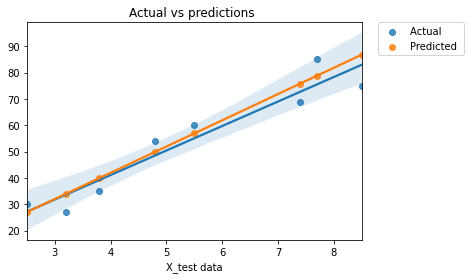

In [118]:
#visualing our predictions
sns.regplot( x=[2.5,7.7,3.8,7.4,5.5, 4.8,3.2,8.5], y=y_test,label='Actual ')
sns.regplot( x=[2.5,7.7,3.8,7.4,5.5, 4.8,3.2,8.5], y=y_pred,label='Predicted ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X_test data')
plt.title("Actual vs predictions ")


Text(0, 0.5, 'y_pred')

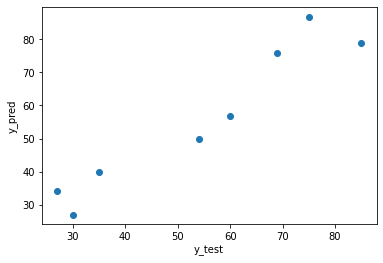

In [129]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

# Predict our own data

In [125]:
#lets predict our own data using the model
hours =[[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.29276125536512


# Evaluating the errors 

In [126]:
from sklearn import metrics

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


We successfull created a model to predict the scores based on hours of study and visualised our predictions . We also evaluated the model using the metrics errors